In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy

# This generates the color space for the plots
from matplotlib import cm

In [15]:
import gmgs
reload(gmgs)

<module 'gmgs' from 'gmgs.pyc'>

In [43]:
# Only used to find the dimensionality of the latent space.
# Let's stick with two for visualisation.
dummy_data = [[0, 0], [1, 1]]
num_clusters = 7

gm = gmgs.GaussianMixture(dummy_data, num_clusters)
points, labels = gm.simulate_data_from_prior(num=500)


The hyperparameters we can set are as follows:

For the dirichlet:
- $\alpha_0$ - Dirichlet parameter (n-dimensional vector)

For the inverse Wishart:
- $\kappa_0$ - Number of prior observations (scalar)
- $\mu_0$ - prior mean (n-dimensional vector)
- $\Lambda_0$ - scale matrix (nxn matrix)
- $\nu_0$ - degrees of freedom

To synthetise data:
- For each data cluster, sample a $\mu$ and $\sigma$ from the distribution
- For each point:
  - sample the Dirichlet distribution for cluster assignment
  - sample the appropriate Gaussians for the point location

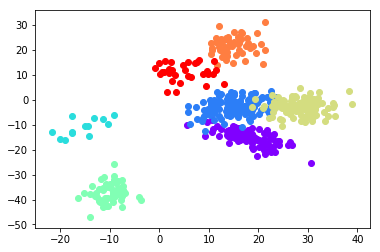

In [44]:
colors = cm.rainbow(numpy.linspace(0, 1, len(set(labels))))

for color_idx, label in enumerate(set(labels)):
    plt.scatter([x[0] for x, l in zip(points, labels) if l == label], 
                [x[1] for x, l in zip(points, labels) if l == label], 
                color=colors[color_idx])

Let's play with the parameters. 

(Full disclosure: The Dirichlet $\alpha$-prior is just a scalar!) 

(Even more embarassingly: I'm not sure why the parameters are what they are. For instance, why does non-integer $\kappa_0$ make sense, and even work quite well? Are there other ways to drive the cluster centers apart?)

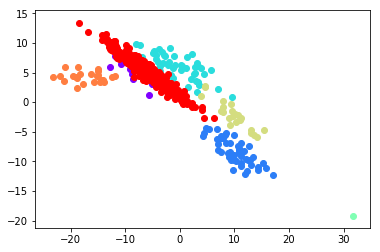

In [45]:
gm_alt = gmgs.GaussianMixture(dummy_data, num_clusters)

gm_alt.alpha = 1
gm_alt.k_0 = 0.05
gm_alt.mu_0 = [0, 0]
gm_alt.lambda_0 = numpy.eye(gm.m)
gm_alt.lambda_0 = numpy.array([[-1, 0.5], [0.5, -0.5]])
gm_alt.v_0 = 10

points_2, labels_2 = gm_alt.simulate_data_from_prior(num=500)

colors = cm.rainbow(numpy.linspace(0, 1, len(set(labels_2))))

for color_idx, label in enumerate(set(labels_2)):
    plt.scatter([x[0] for x, l in zip(points_2, labels_2) if l == label], 
                [x[1] for x, l in zip(points_2, labels_2) if l == label], 
                color=colors[color_idx])

Let's cluster the data!

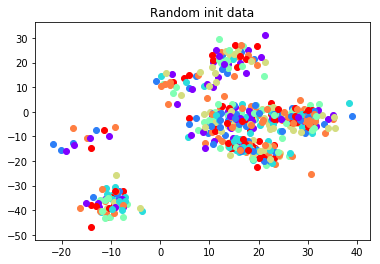

In [46]:
gm = gmgs.GaussianMixture(numpy.array(points), num_clusters)
colors = cm.rainbow(numpy.linspace(0, 1, len(set(labels))))

for i in xrange(gm.N):
    p = gm.data[i, :]
    k = numpy.argmax(gm.membership[i, :])
    c = colors[k]
    x, y = p
    plt.scatter([x], [y], color=c)
plt.title('Random init data')
plt.show()

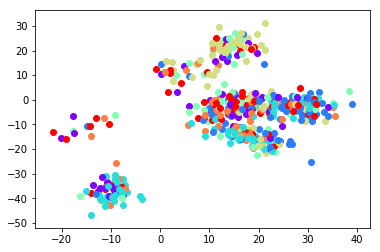

In [47]:
gm.init_cache()

gm.gibbs_round()
for i in xrange(gm.N):
    p = gm.data[i, :]
    k = numpy.argmax(gm.membership[i, :])
    c = colors[k]
    x, y = p
    plt.scatter([x], [y], color=c)
plt.show()

In [48]:
gm.fit(burn_in=0)

Burn-in
Fit
0 / 300
1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
Converged in 39 steps


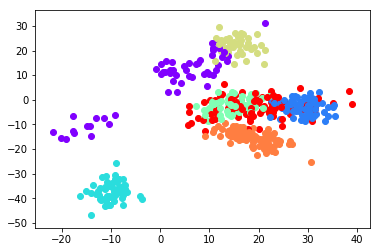

In [49]:
for i in xrange(gm.N):
    p = gm.data[i, :]
    k = numpy.argmax(gm.membership[i, :])
    c = colors[k]
    x, y = p
    plt.scatter([x], [y], color=c)
plt.show()

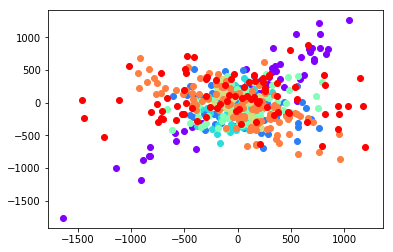

In [50]:

points_3, labels_3 = gm.simulate_data_from_posterior(num=500)

colors = cm.rainbow(numpy.linspace(0, 1, len(set(labels_3))))

for color_idx, label in enumerate(set(labels_3)):
    plt.scatter([x[0] for x, l in zip(points_3, labels_3) if l == label], 
                [x[1] for x, l in zip(points_3, labels_3) if l == label], 
                color=colors[color_idx])

# 